In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the csv file
data = pd.read_csv("/content/diamonds.csv")

# delete first column
del data[data.columns[0]]
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# shape of data
data.shape

(53940, 10)

In [ ]:
# using sample() func, we fraction our dataset.
data = data.sample(frac=0.2)

In [ ]:
# shape of data after fraction
data.shape

(10788, 10)

In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
43475,0.52,Good,F,VS1,61.0,61.0,1419,5.22,5.17,3.17
18235,1.20,Premium,G,VS2,62.4,59.0,7405,6.74,6.68,4.19
22170,1.52,Premium,E,SI2,61.0,59.0,10214,7.39,7.33,4.49
3932,1.01,Very Good,J,SI1,62.9,57.0,3499,6.35,6.37,4.00
47346,0.50,Ideal,D,VS2,62.5,54.0,1845,5.09,5.05,3.17


In [ ]:
# using reset_index(), let the started index from 1
data.reset_index(inplace=True, drop=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.52,Good,F,VS1,61.0,61.0,1419,5.22,5.17,3.17
1,1.20,Premium,G,VS2,62.4,59.0,7405,6.74,6.68,4.19
2,1.52,Premium,E,SI2,61.0,59.0,10214,7.39,7.33,4.49
3,1.01,Very Good,J,SI1,62.9,57.0,3499,6.35,6.37,4.00
4,0.50,Ideal,D,VS2,62.5,54.0,1845,5.09,5.05,3.17


In [ ]:
# finding correlation of data using correlation coefficiets 
correlation = data.corr()
correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.044469,0.167368,0.921174,0.975854,0.975188,0.966064
depth,0.044469,1.000000,-0.286248,0.002987,-0.011686,-0.014727,0.115399
table,0.167368,-0.286248,1.000000,0.114981,0.182257,0.176329,0.140194
price,0.921174,0.002987,0.114981,1.000000,0.883550,0.885498,0.871398
x,0.975854,-0.011686,0.182257,0.883550,1.000000,0.998869,0.983247
y,0.975188,-0.014727,0.176329,0.885498,0.998869,1.000000,0.982926
z,0.966064,0.115399,0.140194,0.871398,0.983247,0.982926,1.000000


In [ ]:
# explore categorical data
data['cut'].unique()

array(['Good', 'Premium', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [ ]:
data['color'].unique()

array(['F', 'G', 'E', 'J', 'D', 'H', 'I'], dtype=object)

In [ ]:
data['clarity'].unique()

array(['VS1', 'VS2', 'SI2', 'SI1', 'VVS2', 'VVS1', 'IF', 'I1'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


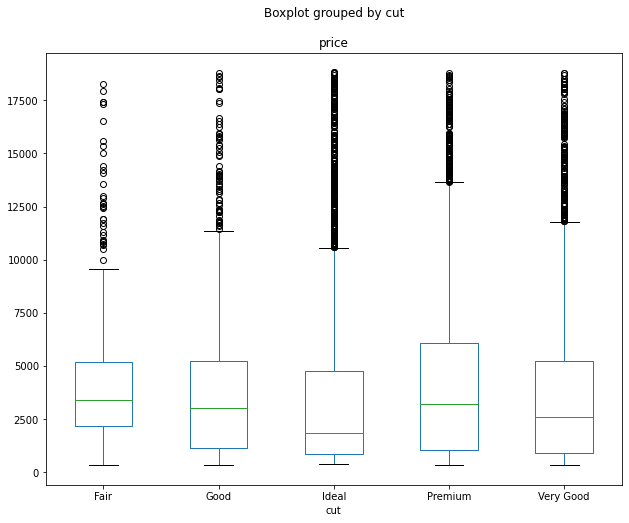

In [ ]:
# find patterns in the price of patterns by cut
data.boxplot(by="cut", column=['price'], grid=False, figsize=(10,8))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


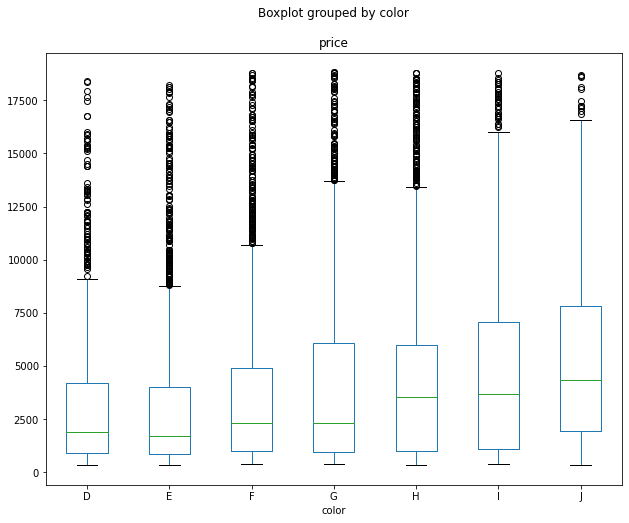

In [ ]:
# find patterns in the color of patterns by color
data.boxplot(by="color", column=['price'], grid=False, figsize=(10,8))

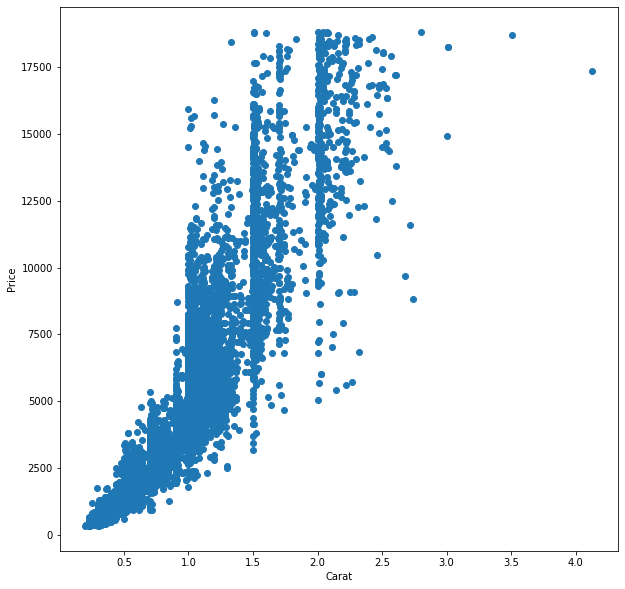

In [ ]:
plt.subplots(figsize=(10,10))
plt.scatter(data['carat'], data['price'])
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

In [ ]:
# clarity_dict is for clarity for diamonds
clarity_dict = {'IF' : 7, 'VVS1' : 6, 'VVS2' : 5, 'VS1' : 4, 'VS2' : 3, 'SI1' : 2, 'SI2' : 1, 'I1' : 0}

#In dataframe, I replace clarity with values
data['clarity'].replace(clarity_dict, inplace=True)

In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.52,Good,F,4,61.0,61.0,1419,5.22,5.17,3.17
1,1.20,Premium,G,3,62.4,59.0,7405,6.74,6.68,4.19
2,1.52,Premium,E,1,61.0,59.0,10214,7.39,7.33,4.49
3,1.01,Very Good,J,2,62.9,57.0,3499,6.35,6.37,4.00
4,0.50,Ideal,D,3,62.5,54.0,1845,5.09,5.05,3.17


In [ ]:
# one hot encoding of cut and color columns using get_dummies()
data = pd.get_dummies(data, columns=['cut', 'color'])
data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.52,4,61.0,61.0,1419,5.22,5.17,3.17,0,1,0,0,0,0,0,1,0,0,0,0
1,1.20,3,62.4,59.0,7405,6.74,6.68,4.19,0,0,0,1,0,0,0,0,1,0,0,0
2,1.52,1,61.0,59.0,10214,7.39,7.33,4.49,0,0,0,1,0,0,1,0,0,0,0,0
3,1.01,2,62.9,57.0,3499,6.35,6.37,4.00,0,0,0,0,1,0,0,0,0,0,0,1
4,0.50,3,62.5,54.0,1845,5.09,5.05,3.17,0,0,1,0,0,1,0,0,0,0,0,0


In [ ]:
# select numeric features
NUMERIC_FEATURES = ['carat', 'depth', 'table', 'x', 'y', 'z']
numeric_df = data[NUMERIC_FEATURES]

numeric_df.describe()

,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.795303,61.757972,57.458102,5.728193,5.730140,3.536455
std,0.468480,1.457532,2.214109,1.111217,1.103232,0.690152
min,0.200000,52.300000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.730000,2.910000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.530000
75%,1.030000,62.500000,59.000000,6.520000,6.520000,4.030000
max,4.130000,79.000000,79.000000,10.000000,9.850000,6.430000


In [ ]:
# standarize the features (Subtracted from mean and Divided by Standard Deviation)
from sklearn.preprocessing import scale
numeric_array = scale(numeric_df)

In [ ]:
# convert standarize features into the dataframe
numeric_df = pd.DataFrame(numeric_array, columns=numeric_df.columns)

In [ ]:
# drop NUMERIC_FEATURES from the main data
data.drop(NUMERIC_FEATURES, inplace=True, axis=1)

In [ ]:
data = pd.concat([data, numeric_df], axis=1)

In [29]:
data.to_csv("diamond_processed.csv")

In [ ]:
# our data is ready to process further, now follow same steps from Numeric data